<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [397]:
import pandas as pd
import psycopg2
import requests
from bs4 import BeautifulSoup
import yaml
import plotly.express as px

In [398]:
with open ('config.yaml') as f:
    data = yaml.safe_load(f)
# data
# params = {k:v.stip() for k, v in (t.split('=') for t in open('config.txt'))}
# params
# Считываю данные подключения и файла (делаю сокрытие данных ввиде логинов/паролей и т.п.) (Довольно долгий способ считывания)

# postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}  # Шаблон строки подлючения (в 1 строку)

In [399]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [400]:
query_3_1 = f'''
SELECT
    count(*) vacansies_count
FROM
    VACANCIES
'''

In [401]:
vacansies_count = pd.read_sql_query(query_3_1, connection)
display(vacansies_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\671705815.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,vacansies_count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [402]:
query_3_2 = f'''
SELECT
    count(*) employer_count
FROM
    EMPLOYERS
'''

In [403]:
employer_count = pd.read_sql_query(query_3_2, connection)
display(employer_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\3860600552.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [404]:
query_3_3 = f'''
SELECT
    count(*) area_count
FROM
    AREAS
'''

In [405]:
area_count = pd.read_sql_query(query_3_3, connection)
display(area_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\56774077.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area_count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [406]:
query_3_4 = f'''
SELECT
    count(*) industries_count
FROM
    INDUSTRIES
'''

In [407]:
industries_count = pd.read_sql_query(query_3_4, connection)
display(industries_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1188689664.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,industries_count
0,294


***

* По данным первичного анализа видно:
1. Количество вакансий всего (49197), а кол-во работодателей (23501) это говорит о нехватке рабочей силы из-за малого кол-ва квалифицированных специалистов, ведь от 1 работодателя может быть предложенных рабочих мест до нескольких десятков.
2. Кол-во регионов довольно большое 1362.
3. Кол-во профессий всего 294 это говорит что найти работников будет довольно сложно, ведь по данным интернета в мире порядка 40 тыс. профессий. И размещенные вакаснии могут не подходить для работодателей.

Для лучшего понимания нам нужно более детально проанализировать данные

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [408]:
query_4_1 = f'''
SELECT 
    a.name AS area, COUNT(v.name) AS cnt
FROM 
    AREAS a
LEFT JOIN 
    VACANCIES v ON a.id = v.area_id
GROUP BY 
    a.name
ORDER BY
    cnt DESC
LIMIT 5
'''

In [409]:
cnt = pd.read_sql_query(query_4_1, connection)
display(cnt)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\3764292790.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [410]:
query_4_2 = f'''
SELECT 
    COUNT(*) salary
FROM 
    VACANCIES
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [411]:
salary = pd.read_sql_query(query_4_2, connection)
display(salary)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1624558400.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [412]:
query_4_3 = f'''
SELECT 
    ROUND(AVG(salary_from)) max_mean,
    ROUND(AVG(salary_to)) min_mean
FROM 
    VACANCIES
'''

In [413]:
salary_mean = pd.read_sql_query(query_4_3, connection)
display(salary_mean)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1774889949.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,max_mean,min_mean
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [414]:
query_4_4 = f'''
SELECT
    schedule,
    employment,
    COUNT(*) schudule_employment
FROM 
    VACANCIES
GROUP BY
    schedule,
    employment
ORDER BY schudule_employment DESC
'''

In [415]:
schudule_employment = pd.read_sql_query(query_4_4, connection)
display(schudule_employment)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\3014985911.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,employment,schudule_employment
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [416]:
query_4_5 = f'''
SELECT
    experience ex_year,
    count(*)
FROM 
    VACANCIES
GROUP BY
    experience
ORDER BY 2 ASC
'''

In [417]:
ex_year = pd.read_sql_query(query_4_5, connection)
display(ex_year)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\3165436566.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,ex_year,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

* Выводы по детальному анализу вакансий:
1. Топ 5 кол-во вакансий находятся в городах милиониках это видно по выведеннуму запросу в задании 1.
2. Половина кандидатов имеет заполненые поля з/п ктр они хотят, это может говорить о том что они следят за рынком труда и знают среднюю з/п. А также видно по з/п вилке что колебание между нижней и верхней границей довольно большое 40 тыс.руб. это может говорить о разных вещах: колебание зарплат у разных работодателей, возможно соискатель желает максимульную зп если от него будут требовать командировки, а также переезд в другой город.
3. Большое кол-во соискателей ищут работу в связке "Полный день-Полная занятость"
4. А также видно что около 15% соискателей не имеют никакого опыта работы. Возможно это выпустившиеся студенты, те кто хочет сменить вид своей работы и он не указывает никакого опыта в данной профессии.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [418]:
query_5_1 = f'''
SELECT
    e.name employers_name,
    count(v.id) vac_count
FROM 
    EMPLOYERS e
LEFT JOIN
    VACANCIES v ON e.id = v.employer_id
GROUP BY
    e.name
ORDER BY
    2 DESC
LIMIT 5
'''

In [419]:
employers_name = pd.read_sql_query(query_5_1, connection)
display(employers_name)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\119924057.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employers_name,vac_count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [420]:
query_5_2 = f'''
SELECT
    a.name employers_area_name,
    count(e.id) employers_count
FROM 
    AREAS a
LEFT JOIN
    EMPLOYERS e on e.area = a.id
LEFT JOIN
    VACANCIES v on a.id = v.area_id
GROUP BY
    1
HAVING 
    count(v.id) = 0
ORDER BY 
    employers_count DESC
'''

In [421]:
employers_area_name = pd.read_sql_query(query_5_2, connection)
display(employers_area_name)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\3063252318.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employers_area_name,employers_count
0,Россия,410
1,Казахстан,207
2,Московская область,75
3,Краснодарский край,19
4,Ростовская область,18
...,...,...
588,Струнино,0
589,Славгород (Алтайский край),0
590,Сорочинск,0
591,Ленинский (Тульская область),0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [422]:
query_5_3 = f'''
SELECT
    e.name AS employers_area,
    COUNT(DISTINCT v.area_id) AS area_count
FROM 
    EMPLOYERS e
JOIN
    VACANCIES v ON e.id = v.employer_id
GROUP BY
    e.name
ORDER BY
    area_count DESC
'''

In [423]:
employers_area = pd.read_sql_query(query_5_3, connection)
display(employers_area)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\57003849.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employers_area,area_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [424]:
query_5_4 = f'''
SELECT
    COUNT(DISTINCT e.id) AS employer_count
FROM 
    EMPLOYERS e
LEFT JOIN
    EMPLOYERS_INDUSTRIES e_i ON e.id = e_i.employer_id
WHERE
    e_i.industry_id IS NULL
'''

In [425]:
industry = pd.read_sql_query(query_5_4, connection)
display(industry)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1759923270.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [426]:
query_5_5 = f'''
SELECT
    e.id,
    e.name,
    COUNT(e_i.industry_id) AS industry_count
FROM 
    EMPLOYERS e
LEFT JOIN
    EMPLOYERS_INDUSTRIES e_i ON e.id = e_i.employer_id
GROUP BY
    e.id, e.name
HAVING
    COUNT(e_i.industry_id) = 4
ORDER BY
    name
'''

In [427]:
industry_count = pd.read_sql_query(query_5_5, connection)
display(industry_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\2898138212.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,id,name,industry_count
0,800646,101 Интернет,4
1,763400,21vek.by,4
2,64174,2ГИС,4
3,29890,2К,4
4,1980996,4 пикселя +,4
...,...,...,...
1133,24365,ЮРИОН,4
1134,863335,ЮТИП Технологии,4
1135,1430484,ЯКласс,4
1136,1620049,ЯрНео,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [428]:
query_5_6 = f'''
SELECT
    COUNT(DISTINCT e.id) AS employer_count
FROM 
    EMPLOYERS e
JOIN
    EMPLOYERS_INDUSTRIES e_i ON e.id = e_i.employer_id
WHERE
    e_i.industry_id IN (
        SELECT id FROM INDUSTRIES WHERE name = 'Разработка программного обеспечения'
    )
'''

In [429]:
employer_count = pd.read_sql_query(query_5_6, connection)
display(employer_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\2272543430.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [430]:
url = "https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
response = requests.get(url)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
soup = BeautifulSoup(response.text, 'html.parser')
# Извлечение таблицы с городами-миллионниками
table = soup.find('table', {'class': 'standard sortable jquery-tablesorter'})

# Получение списка городов из таблицы
cities = []
HTML_data = soup.find_all("table")[0].find_all("tr")[1:] # Пропускаем заголовок таблицы
for row in HTML_data:
    city_cell = row.find_all('td')[1]  # Получаем ячейку с названием города
    city = city_cell.text.strip()  # Извлекаем текст из ячейки
    cities.append(city)

cities_set = tuple(cities)
display(cities_set)

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [431]:
query_5_7 = f'''
SELECT 
    "Название города",
    cnt
FROM
    (SELECT 
        a.name AS "Название города",
    COUNT
        (v.id) AS cnt
    FROM 
        areas a 
    LEFT JOIN 
        vacancies v ON v.area_id = a.id
    LEFT JOIN 
        employers AS e ON e.id = v.employer_id
    WHERE 
        e.name = 'Яндекс'
        AND a.name IN {cities_set}
    GROUP BY 1 

    UNION ALL

    SELECT 
        'Total' AS "Название города",
        COUNT(v.id) AS cnt
    FROM 
        areas a 
    LEFT JOIN 
        vacancies v ON v.area_id = a.id
    LEFT JOIN 
        employers AS e ON e.id = v.employer_id
    WHERE 
        e.name = 'Яндекс'
        AND a.name IN {cities_set}
    GROUP BY 
        1) AS city
'''

In [432]:
city = pd.read_sql_query(query_5_7, connection)
display(city)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\3450362412.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Название города,cnt
0,Total,485
1,Волгоград,24
2,Воронеж,32
3,Екатеринбург,39
4,Казань,25
5,Краснодар,30
6,Красноярск,23
7,Москва,54
8,Нижний Новгород,36
9,Новосибирск,35


***

На основе представленных данных о работодателях можно сделать несколько выводов:

1. Лидеры по количеству вакансий:
   - Найбольшее количество вакансий (1933) предлагает Яндекс, что подтверждает его статус одного из ведущих работодателей в стране.
   - Следующими по количеству вакансий идут Ростелеком (491), Тинькофф (444), СБЕР (428) и Газпром нефть (331). Это указывает на высокую активность этих компаний в поиске сотрудников.

2. Географическая распределённость работодателей:
   - Наибольшее число работодателей сосредоточено в России (410), за ней следует Казахстан (207).
   - В пределах России более всего работодателей представлено в Московской области (75) и Краснодарском крае (19). Это может указывать на экономическую активность и возможности в этих регионах.

3. Концентрация вакансий по регионам:
   - Вакансии распределены неравномерно по городу. Москва, с 54 вакансиями, является лидером среди российских городов, за ней следует Санкт-Петербург с 42 вакансиями. Это подтверждает предполагаемую концентрацию рабочих мест в крупных городах.

4. Наличие работодателей в небольших населённых пунктах:
   - Существует множество работодателей, предлагающих единичные вакансии, даже в малых городах, таких как Струнино, Славгород и другие. Это может свидетельствовать о наличии маленьких фирм и индивидуальных предпринимателей, создающих рабочие места.

5. Конкуренция среди работодателей:
   - Крупные компании, такие как Яндекс, Ростелеком и Газпром нефть, продолжают сохранять лидерство, что может затруднять поиск работы для соискателей, если они особенно популярны среди работников.

6. Возможности для карьерного роста:
   - Наличие большого числа вакансий в крупных компаниях означает, что потенциальные соискатели могут рассчитывать на возможность карьерного роста.

Эти выводы могут помочь соискателям и исследователям рынка труда лучше понимать текущее состояние занятости и тенденции в различных регионах и отраслях.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [433]:
query_6_1 = f'''
SELECT
    count(*) as experience_count
FROM
    VACANCIES v
WHERE 
    LOWER(v.name) LIKE '%data%' 
    OR LOWER(v.name) LIKE '%данн%'
'''

In [434]:
experience_count = pd.read_sql_query(query_6_1, connection)
display(experience_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\369904572.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience_count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [435]:
query_6_2 = f'''
SELECT
    count(*) as ds_count
FROM
    VACANCIES v
WHERE
(
    (v.name ILIKE '%data scientist%') 
    OR (v.name ILIKE '%data science%') 
    OR (v.name ILIKE '%исследователь данных%')
    OR ((v.name ILIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
)
    AND (v.name ILIKE '%junior%'
    OR v.experience ILIKE '%Нет опыта%'
    OR v.employment ILIKE '%Стажировка%')
'''

In [436]:
ds_count = pd.read_sql_query(query_6_2, connection)
display(ds_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1008293209.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,ds_count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [437]:
query_6_3 = f'''
SELECT
    count(*) as sql_count
FROM
    VACANCIES v
WHERE
(
    (v.name ILIKE '%data scientist%') 
    OR (v.name ILIKE '%data science%') 
    OR (v.name ILIKE '%исследователь данных%')
    OR ((v.name ILIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
)
AND
(
    (v.key_skills ILIKE '%SQL%')
    OR (v.key_skills ILIKE '%postgres%')
)
'''

In [438]:
sql_count = pd.read_sql_query(query_6_3, connection)
display(sql_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1130169376.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,sql_count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [439]:
query_6_4 = f'''
SELECT
    count(*) as python_count
FROM
    VACANCIES v
WHERE
(
    (v.name ILIKE '%data scientist%') 
    OR (v.name ILIKE '%data science%') 
    OR (v.name ILIKE '%исследователь данных%')
    OR ((v.name ILIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
)
AND
(
    (v.key_skills ILIKE '%PYTHON%')
)
'''

In [440]:
python_count = pd.read_sql_query(query_6_4, connection)
display(python_count)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1181196312.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,python_count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [441]:
query_6_5 = f'''
SELECT
    round(avg(length(key_skills) - length(replace(key_skills,CHR(9),''))+1),2) as skills_counts
FROM
    VACANCIES v
WHERE
(
    (v.name ILIKE '%data scientist%') 
    OR (v.name ILIKE '%data science%') 
    OR (v.name ILIKE '%исследователь данных%')
    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (v.key_skills IS NOT NULL)
)
'''

In [442]:
skills_counts = pd.read_sql_query(query_6_5, connection)
display(skills_counts)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1441465032.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,skills_counts
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [443]:
query_6_6 = f'''
SELECT
    DISTINCT experience as year,
    ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) as avg_salary
FROM
    VACANCIES v
WHERE
(
    (v.name ILIKE '%data scientist%') 
    OR (v.name ILIKE '%data science%') 
    OR (v.name ILIKE '%исследователь данных%')
    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (v.key_skills IS NOT NULL)
)
GROUP BY
    v.experience
'''

In [444]:
df_salary = pd.read_sql_query(query_6_6, connection)
display(df_salary)


C:\Users\User\AppData\Local\Temp\ipykernel_24252\1751921465.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,year,avg_salary
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,145236.0
3,От 3 до 6 лет,243115.0


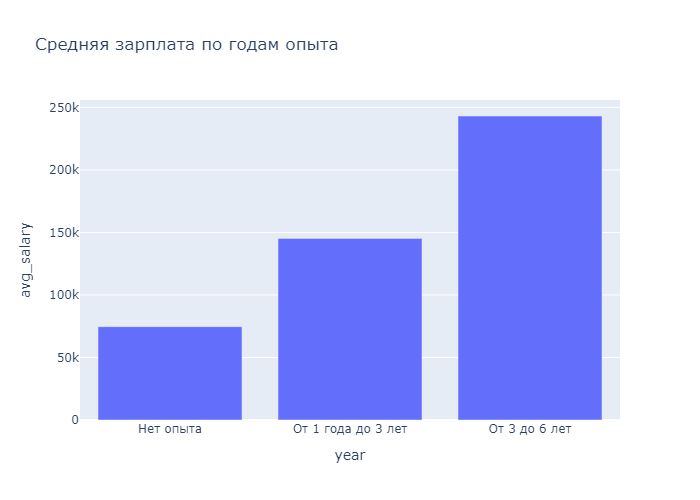

In [445]:
bar_sal = df_salary.dropna(subset=['avg_salary'])
fig = px.bar(
    data_frame=bar_sal,
    x='year',
    y='avg_salary',
    title='Средняя зарплата по годам опыта'
)

fig.show('png')

***

На основе представленных данных по предметному анализу можно сделать несколько выводов:
    
   
1. Статистика по навыкам:
    - Для удовлетворительной работы или для получения более высокой зарплаты необходимо иметь среднее количество навыков — 6.41.

2. Зарплаты в зависимости от опыта:
    - По имеющимся категориям можно заметить, что зарплата значительно растёт с увеличением опыта. Специалисты с 1-3 годами получают в среднем 145236.0, что значительно меньше, чем у тех, у кого опыт от 3 до 6 лет.
    - Сравнение опыта показывает, что наиболее высокие зарплаты в категории "От 3 до 6 лет" (243115.0).
    - Отсутствие данных для категории "Более 6 лет" может требовать дальнейшего изучения, чтобы понять, какую зарплату получают наиболее опытные специалисты.
    
3. Общий вывод:
   - В целом, решение о том, как развивать навыки, может быть связано с желанием увеличить свою компенсацию. Специалистам рекомендуется стремиться получить опыт работы более 3 лет, чтобы повысить свои шансы на получение более высокой зарплаты.
   - Развитие ряда востребованных навыков (например, Python и SQL) может помочь в повышении заработка и улучшении карьерных перспектив.

Дополнительно, для более глубокого анализа могли бы помочь такие факторы, как город, специфика отрасли, текущее состояние рынка труда и другие параметры.


# Общий вывод по проекту

Доп т/з: Сколько в среднем ключевых навыков имеет специалисты по DS в разрезе опыта работы.

In [446]:
query_6_7 = f'''
SELECT
    v.experience,
    round(avg(length(key_skills) - length(replace(key_skills,CHR(9),''))+1),2) as skills_counts
FROM
    VACANCIES v
WHERE
    (
    (v.name ILIKE '%data scientist%') 
    OR (v.name ILIKE '%data science%') 
    OR (v.name ILIKE '%исследователь данных%')
    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (v.key_skills IS NOT NULL)
    )
GROUP BY
    v.experience
'''

In [447]:
df_skills = pd.read_sql_query(query_6_7, connection)
display(df_skills)

C:\Users\User\AppData\Local\Temp\ipykernel_24252\1640329804.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,skills_counts
0,Более 6 лет,5.94
1,Нет опыта,7.42
2,От 1 года до 3 лет,6.73
3,От 3 до 6 лет,5.99


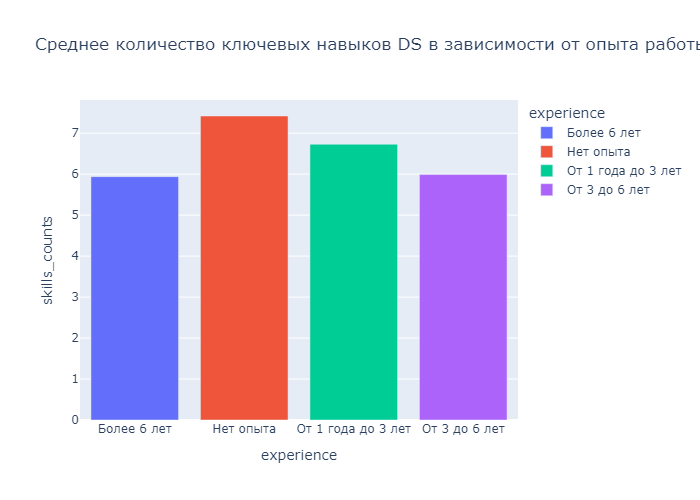

In [448]:
box_skills = df_skills.dropna(subset=['skills_counts'])
fig = px.bar(
    data_frame=box_skills,
    x='experience',
    y='skills_counts',
    title='Среднее количество ключевых навыков DS в зависимости от опыта работы.',
    color='experience'
)

fig.show('png')

Общий вывод по проекту позволяет выделить несколько ключевых аспектов, касающихся рынка труда и зарплат в зависимости от опыта, а также распределения вакансий по компаниям и регионам.

1. Зарплатные ожидания в зависимости от опыта: 
    - С увеличением профессионального опыта наблюдается значительный рост зарплат. Специалисты с опытом работы от 1 до 3 лет зарабатывают в среднем 145236.0, что существенно ниже, чем у тех, кто имеет 3-6 лет опыта (средняя зарплата 243115.0). Это подчеркивает важность опыта при определении уровня дохода. Отсутствие данных для категории "Более 6 лет" указывает на необходимость дополнительного исследования, чтобы получить полное представление о заработных платах самых опытных специалистов.
    - Еще можно заметить что у специалистов с опытом работы (Более 6 лет) среднее кол-во навыков меньше по сравнению

2. Активность компаний в наборе кадров: 
    - Наиболее активными работодателями на рынке являются Яндекс, Ростелеком, Тинькофф, СБЕР и Газпром нефть, что подтверждается их значительным количеством вакансий. Яндекс выделяется с 1933 вакансиями, что укрепляет его позицию как одного из главных игроков на рынке труда.

3. Региональное распределение вакансий: 
    - Концентрация вакансий сосредоточена в крупных городах, таких как Москва и Санкт-Петербург. Это иллюстрирует тенденцию к сосредоточению рабочих мест в urban-центрах, что может отражать экономические и социальные факторы, способствующие притяжению талантов и ресурсов в крупных мегаполисах.

В целом, изучение зарплат в зависимости от опыта, активности работодателей и распределения вакансий по регионам помогает лучше понять динамику рынка труда и может послужить руководством для соискателей при выборе места работы и планировании своей карьеры. Рекомендовано проводить дальнейшие исследования, в частности для визуализации более опытной категории работников, что позволит получить более полное представление о структуре зарплат.